# Data cleaning with klib

## Imports

In [ ]:
!pip install klib

In [26]:
import klib
import pandas as pd
from zipfile import ZipFile

In [4]:
print(f"{klib.__version__}")

1.1.2


## Datasets

#### Downloads

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Go to https://www.kaggle.com/etidata/account
# Create an API token and save it under ~/.kaggle/kaggle.json

!kaggle datasets download -d mlg-ulb/creditcardfraud
!kaggle datasets download -d sogun3/uspollution
!kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe

#### Unzip

In [11]:
filenames = ["creditcardfraud", "uspollution", "515k-hotel-reviews-data-in-europe"]
for filename in filenames:
    with ZipFile(filename + ".zip", 'r') as zipObj:
        zipObj.extractall('datasets')

## Data Cleaning

In [12]:
df_fraud = pd.read_csv("./datasets/creditcard.csv")
df_pollution = pd.read_csv("./datasets/pollution_us_2000_2016.csv")
df_hotel = pd.read_csv("./datasets/Hotel_Reviews.csv")

In [13]:
# Cleaning all these dataframes might take a moment
df_fraud_cleaned = klib.data_cleaning(df_fraud, show=None)
print("1/3")
df_pollution_cleaned = klib.data_cleaning(df_pollution, show=None)
print("2/3")
df_hotel_cleaned = klib.data_cleaning(df_hotel, show=None)
print("3/3")

1/3
2/3
3/3


## Comparisson

In [14]:
def byte_to_mb(df):
    return round(df.memory_usage(deep=True).sum()/1024**2,2)

In [15]:
df_dict = {"Fraud" : df_fraud, "Pollution" : df_pollution, "Hotel" : df_hotel}
for name, df in df_dict.items():
    print(f"{name}".ljust(15), f"Shape: {df.shape}".ljust(25), f"Memory: {byte_to_mb(df)}")

Fraud           Shape: (284807, 31)       Memory: 67.36
Pollution       Shape: (1746661, 29)      Memory: 1341.26
Hotel           Shape: (515738, 17)       Memory: 459.37


In [ ]:
df_cleaned_dict = {"Fraud" : df_fraud_cleaned, "Pollution" : df_pollution_cleaned, "Hotel" : df_hotel_cleaned}
for name, df in df_cleaned_dict.items():
    print(f"{name}".ljust(15), f"Shape: {df.shape}".ljust(25), f"Memory: {byte_to_mb(df)}")

Fraud           Shape: (283726, 31)       Memory: 34.91
Pollution       Shape: (1746661, 25)      Memory: 203.86
Hotel           Shape: (515212, 17)       Memory: 249.06


In [16]:
def compare_dtypes(df, df2):
    df_dtypes = df.dtypes.rename("dtypes").to_frame().reset_index()
    df_dtypes_cleaned = df2.dtypes.rename("dtypes_cleaned").to_frame().reset_index()
    df_dtypes["index"] = klib.clean_column_names(df).columns
    df_dtypes = df_dtypes.merge(df_dtypes_cleaned, on="index", how="outer").set_index("index").fillna("- dropped -")
    return df_dtypes

In [17]:
df_hotel.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [18]:
dtypes_fraud = compare_dtypes(df_fraud, df_fraud_cleaned)
dtypes_pollution = compare_dtypes(df_pollution, df_pollution_cleaned)
dtypes_hotel = compare_dtypes(df_hotel, df_hotel_cleaned)

In [19]:
dtypes_pollution

,dtypes,dtypes_cleaned
index,,
unnamed_0,int64,int32
state_code,int64,int8
county_code,int64,int16
site_num,int64,int16
address,object,category
state,object,category
county,object,category
city,object,category
date_local,object,category


In [20]:
print("value_counts():")
%timeit df_fraud.value_counts()
%timeit df_fraud_cleaned.value_counts()
print("max():")
%timeit df_fraud.max()
%timeit df_fraud_cleaned.max()
print("\nsort_values():")
%timeit df_fraud.sort_values("v1")
%timeit df_fraud_cleaned.sort_values("v1")
print("\nnlargest():")
%timeit df_fraud.nlargest(5, "v1")
%timeit df_fraud_cleaned.nlargest(5, "v1")

value_counts():
3.43 s ± 507 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.52 s ± 466 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
max():
30.1 ms ± 510 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
30.4 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

sort_values():
120 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
168 ms ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

nlargest():
42.8 ms ± 5.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
32 ms ± 954 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
print("value_counts():")
%timeit df_pollution.value_counts()
%timeit df_pollution_cleaned.value_counts()
print("max():")
%timeit df_pollution.max()
%timeit df_pollution_cleaned.max()
print("\nsort_values():")
%timeit df_pollution.sort_values("state_code")
%timeit df_pollution_cleaned.sort_values("state_code")
print("\nlargest():")
%timeit df_pollution.nlargest(5, "state_code")
%timeit df_pollution_cleaned.nlargest(5, "state_code")

value_counts():
5.08 s ± 813 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.36 s ± 542 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
max():
3.84 s ± 925 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, i

41.5 ms ± 788 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

sort_values():
547 ms ± 68.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
307 ms ± 4.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

largest():
460 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
113 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
print("value_counts():")
%timeit df_hotel.value_counts()
%timeit df_hotel_cleaned.value_counts()
print("max():")
%timeit df_hotel.max()
%timeit df_hotel_cleaned.max()
print("\nsort_values():")
%timeit df_hotel.sort_values("review_date")
%timeit df_hotel_cleaned.sort_values("review_date")
print("\nnlargest():")
%timeit df_hotel.nlargest(5, "lng")
%timeit df_hotel_cleaned.nlargest(5, "lng")

value_counts():
4.17 s ± 1e+03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.43 s ± 694 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
max():
848 ms ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, i

238 ms ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

sort_values():
1.26 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
398 ms ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

nlargest():
85.7 ms ± 8.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
151 ms ± 27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---

## Memory

In [ ]:
%load_ext memory_profiler

In [27]:
%memit df_fraud.value_counts()
%memit df_fraud_cleaned.value_counts()
%memit df_pollution.value_counts()
%memit df_pollution_cleaned.value_counts()
%memit df_hotel.value_counts()
%memit df_hotel_cleaned.value_counts()

UsageError: Line magic function `%memit` not found.


---

## Bonus - Plots

GridSpec(6, 8)

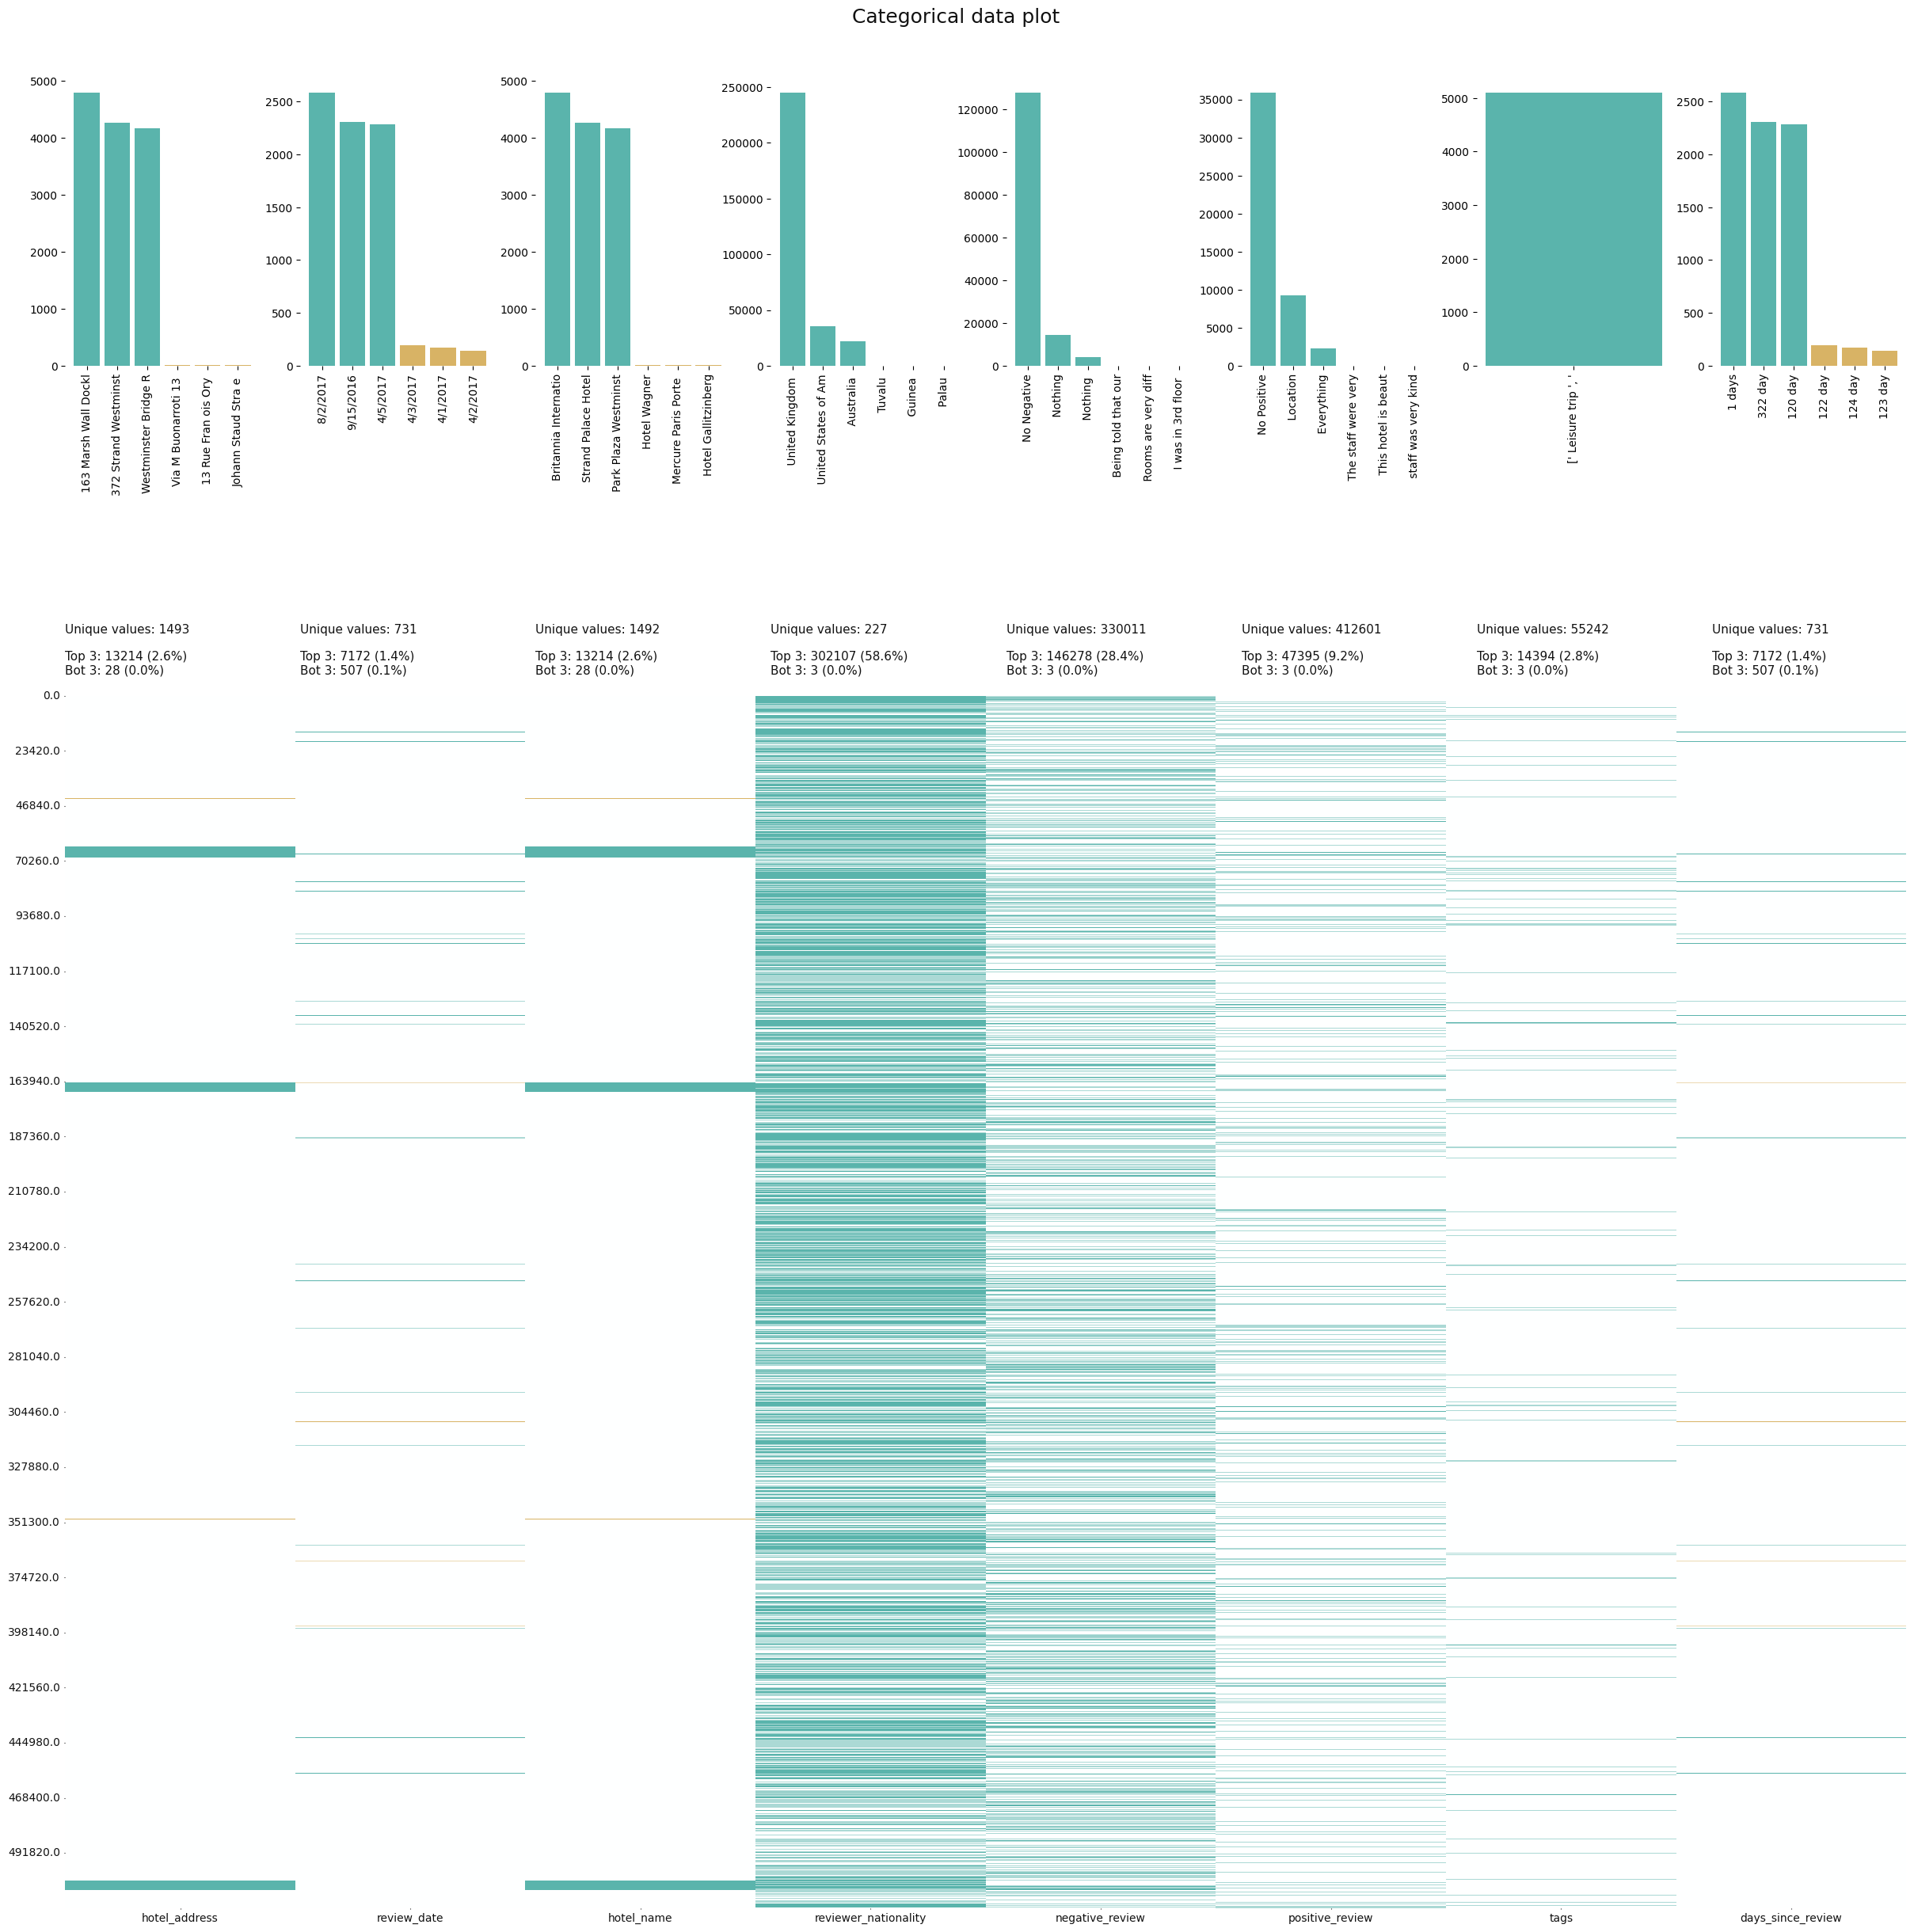

In [29]:
klib.cat_plot(df_hotel_cleaned, figsize=(30,30))

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


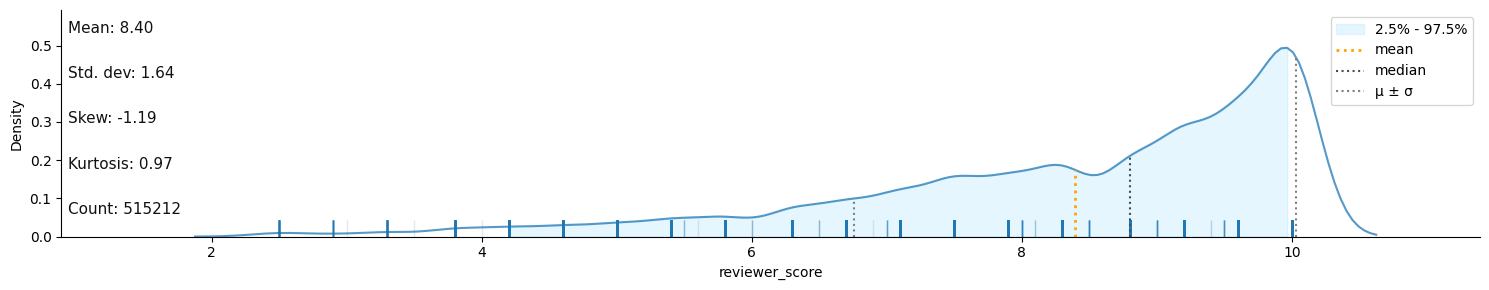

In [30]:
distplot = klib.dist_plot(df_hotel_cleaned["reviewer_score"])

In [ ]:
# distplot.figure.savefig("dist_plot.png", dpi=200, bbox_inches='tight')

GridSpec(6, 6)

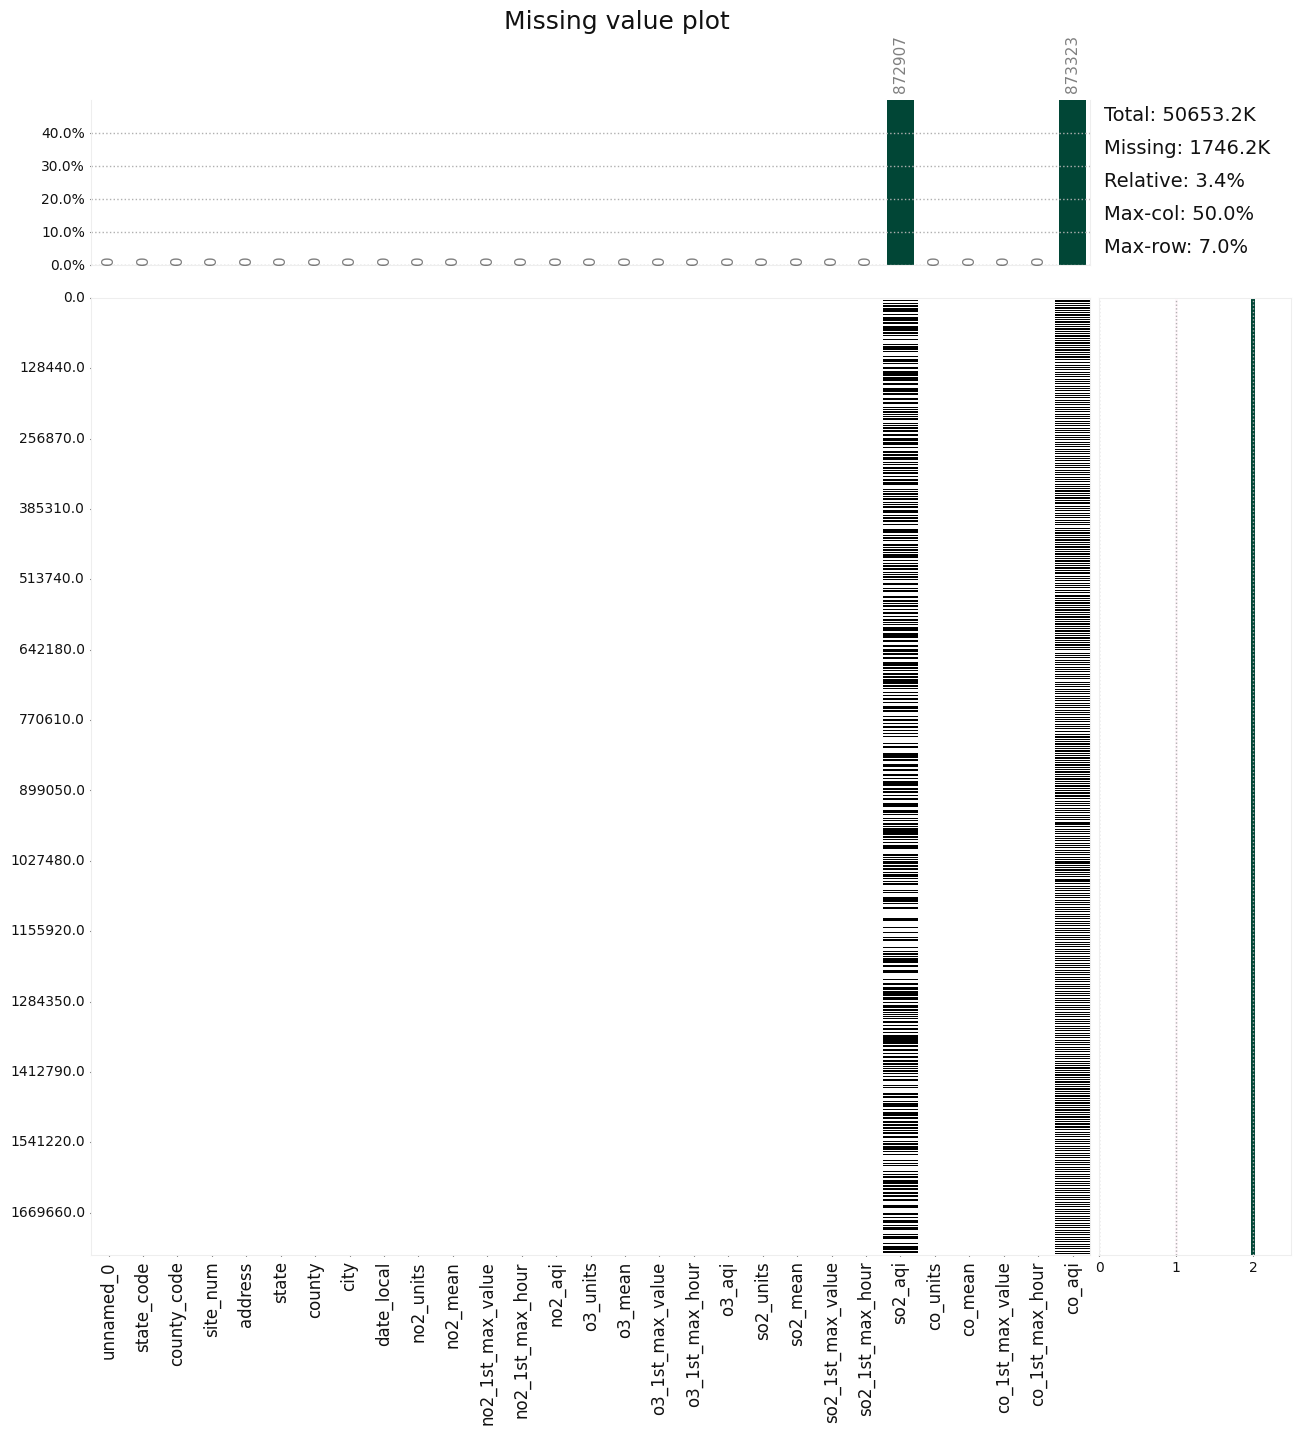

In [31]:
klib.missingval_plot(df_pollution, figsize=(15,15))